## hw4 due 11:59pm Thu 19 March

#### Submit steps 1-8 for a grade of up to 100 points or submit steps 7 and 8 for a grade of up to 130 points. 

### Instructions (like whiteboard version of 3 March, but with more words) 

1. Choose 3 distributions from 3 different families (they can't all be normal or uniform or beta or whatever). <br> Choosing a dist is the same as choosing a pdf, so let's call them $f_1, f_2, f_3$.    
2. (10 points) From each $f_i$ generate a sample of $n=12$ data points.  Call the samples $dat_1, dat_2, dat_3$.  <br>
Code like this:  **dati = stats.f_i.rvs(..., size = 12)**, where $f_i$ and ... depend on your dist.  
3.  For $dat_1$ use **putaboxonit(x, h, ...)**  to produce an estimate $\hat{f_1}$ of the mother pdf $f_1$. Plot it to see how it looks. Experiment with different choices of $h$ to see how it changes.   Nothing to turn in here, just experiment. <br> 
We did this in class with $n=8$ from $beta(5,2)$. We made 8 calls to **putaboxonit(x, h)**, we got 8 boxes, we plotted them on top of each other and it was a mess, then we ADDED the boxes together and called the result **yout**. The plot of **yout** looked like a distribution; another way to say it is $\hat f =$ **yout** is an estimate of the mother pdf $f$ which was $beta(5,2)$.  Here I'm asking you to produce (and plot) **yout** using $dat_1$ and different values of $h$. Each **yout** is an estimate of your pdf $f_1$.  
4.  (30 points) From your experiments, keep 3 versions of $\hat f_1$:  one where $h$ is too small (undersmoothed, boxes don't overlap much), one where $h$ is too large (oversmoothed, boxes overlap like crazy), and one where $h$ looks just right.  Let's call them $\hat f_1^u, \hat f_1^o, \hat f_1^*$.  Deliver a single plot showing these three curves AND $f_1$ and the data $dat_1$ all together.  Legends are good on plots like these. 
5.  (10 points) Repeat steps 3 and 4 for $dat_2$ and $f_2$. 
6.  (10 points) Repeat steps 3 and 4 for $dat_3$ and $f_3$. 
7.  (30 points) Repeat steps 2 - 6 with $n=40$ instead of $n=12$.  
8.  (10 points) There's no reason we have to use boxes;  all of this could work with a different shape.  Think a little and write a function called **putabumponit(x,h,...)**.  The ... means there might be other inputs.  The whiteboard instructions said "write and deploy".  By "deploy" I mean use your function enough to show that it works.  A plot might be good. 
9.  (120 points) Complete steps 2 - 7 using **putabumponit()** instead of **putaboxonit()**.  


In [2]:
# the usual starting block
# added pandas
import numpy as np 
%matplotlib inline   
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import math
from scipy import stats
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  
# asking jupyter to show all output on execution, not just the final value
# other options:  instead of "all"  use "last_expr" or "none"

In [3]:
dat1=stats.norm.rvs(loc=0, scale=1, size=12)
dat1

array([ 0.63627551,  0.23970313,  1.31550183,  1.10660165,  0.32426279,
        0.99304359,  0.07396175,  0.32426925,  1.68890441,  0.78874956,
        1.41812606, -0.01145019])

In [4]:
def putaboxonit(datvec, h):
    #xvec=np.arange(-0.2,1.2,0.01)
    xmin = datvec.min()
    xmax = datvec.max()
    nobs = len(datvec)
    xvec = np.arange(xmin - 2*h, xmax + 2*h, .001)
    
    yvec = np.zeros(len(xvec))
    for i in datvec:
        yvec += stats.uniform.pdf(xvec,i-h,2*h)
    yvec = 1/nobs * yvec
    
    plt.ylim(top = 1.6 * yvec.max())
    plt.plot(xvec, yvec, c='orangered')
    return yvec, xvec

In [5]:
dat2=stats.uniform.rvs(loc=0, scale=1, size=12)
dat2

array([0.61168644, 0.0553927 , 0.09266635, 0.35601233, 0.35294437,
       0.69467702, 0.92127099, 0.22054904, 0.15982675, 0.88747069,
       0.63976485, 0.74138897])

In [6]:
dat3=stats.beta.rvs(5,2,loc=0, scale=1, size=12)
dat3

array([0.80144752, 0.95658048, 0.80016872, 0.83565129, 0.80170544,
       0.92099971, 0.73853805, 0.52874015, 0.41617311, 0.78679712,
       0.8717707 , 0.88890826])

## Functions in python -- the basic template
Python functions have this structure: 

**def** *functionname*(arg1, arg2, ...)**\:** <br>
&ensp;&ensp;&ensp;    """ docstring """ <br>
&ensp;&ensp;&ensp;        code<br>
&ensp;&ensp;&ensp;        more code <br>
&ensp;&ensp;&ensp;        ...<br>
&ensp;&ensp;&ensp;        excellent code <br>
&ensp;&ensp;&ensp;        *value* = ... <br>
&ensp;&ensp;&ensp;        **return** *value*<br>


## Example:  write a function to make python's unif.rvs() function work like R's runif()

In [7]:
def myrunif(n, a, b ):
    """ reparameterizing python's uniform random number generator 
        to make it behavelike R's runif() function
        n = number of random numbes to generate
        a,b = left and right boundaries of uniform dist
    """
    leftboundary  = a
    width  = b - a
    val = stats.uniform.rvs(loc = leftboundary, scale = width, size = n)
    return val 

## test the function

In [8]:
myrunif(5,0,1)
myrunif(5, 10, 20)
myrunif(5000, 0, 100).min()
bigvec = myrunif(5000000, 0, 100)
bigvec.max()

array([0.50041312, 0.02092258, 0.69556468, 0.18820251, 0.26905748])

array([15.67746746, 18.47300307, 11.16704644, 12.42417498, 11.90944603])

0.08614981612615757

99.99998500945844

### generate a random value from beta(5,2)
### on Tuesday we got .406 so we use x = .406 below 

In [9]:
stats.beta.rvs(5, 2, size =12)

array([0.713084  , 0.91816605, 0.82171086, 0.69385515, 0.72377321,
       0.55872917, 0.51790998, 0.59749438, 0.75103922, 0.76124782,
       0.67075644, 0.92577856])

Plotting a box centered on x = .406, width = 2h, area = 1. 
Later we turn this into a function.  

(0.0, 4)

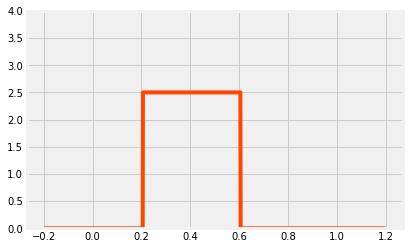

In [21]:
plt.ylim(top = 4)
x = .406  
h = .2
xvec=np.arange(-0.2,1.2,0.001) # we choose this xvec because we KNOW h=.2 and we KNOW beta dist is between 0 and 1
yvec=stats.uniform.pdf(xvec, x-h, 2*h) 
# parameters (xvalues, loc = left boundary, scale = width )
plt.plot(xvec, yvec, c='orangered')

In [9]:
### now write the same code as a function
### inputs are x and h
### function name = putaboxonit
### calling putaboxonit(.406, .2) should produce same plot as above
### your function should return yvec
### add inputs for top, color, etc. if you want 
...

Ellipsis

numpy.ndarray

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.91834154, 2.16881219, 2.28291805, 2.35747129,
       2.41235201, 2.45525949, 2.49001715, 2.51880963, 2.54300403,
       2.56351192, 2.58096977, 2.59583749, 2.60845584, 2.61908176,
       2.62791103, 2.63509329, 2.64074215, 2.64494217, 2.64775362,
       2.64921562, 2.64934817, 2.64815307, 2.64561401, 2.64169581,
       2.63634265, 2.62947514, 2.62098597, 2.61073339, 2.59853186,
       2.58413818, 2.56723068, 2.54737699, 2.52398211, 2.49620

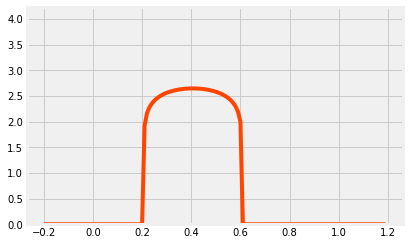

In [10]:
def putabumponit(x,h):
    xvec=np.arange(-0.2,1.2,0.01)
    yvec=stats.beta.pdf(xvec,1.1,1.1, x-h, 2*h) 
    # parameters (xvalues, loc = left boundary, scale = width )
    plt.ylim(top = 1.6 * yvec.max())
    plt.plot(xvec, yvec, c='orangered')
    return yvec

out = putabumponit(.406, .2)
type(out)
out

## test your function with different values of x and h ...

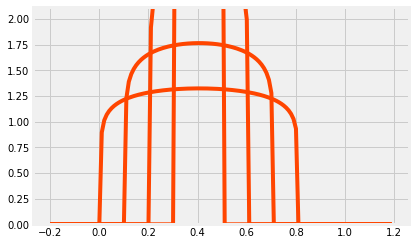

In [11]:
out = putabumponit(.406, .1)
out = putabumponit(.406, .2)
out = putabumponit(.406, .3)
out = putabumponit(.406, .4) # run them in the opposite order would frame it better

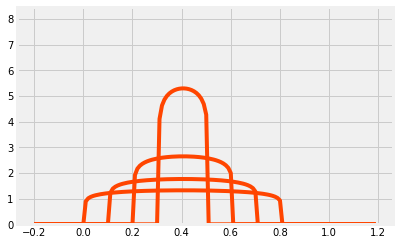

In [12]:
out = putabumponit(.406, .4)
out = putabumponit(.406, .3)
out = putabumponit(.406, .2)
out = putabumponit(.406, .1)

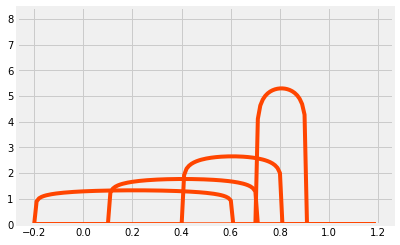

In [13]:
out = putabumponit(.206, .4) # now try different x values
out = putabumponit(.406, .3)
out = putabumponit(.606, .2)
out = putabumponit(.806, .1)

## next ...
Generate n=8 values from beta(5,2). 

Run putaboxonit() for each one to get 8 yvecs. 

Add these yvecs together.   Use a loop if you want.  In class we didn't. 

In [15]:
xdata = stats.beta.rvs(5,2, size = 8)
xdata

array([0.72525764, 0.90020513, 0.80555402, 0.80399598, 0.90142218,
       0.81162288, 0.78307385, 0.73896073])

In [16]:
xdata[0]
xdata[1]

0.7252576402116636

0.9002051274843833

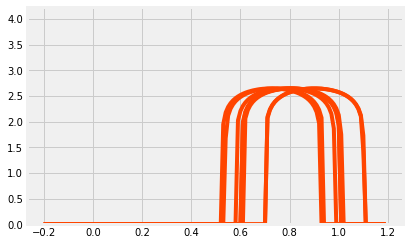

In [17]:
yout = putaboxonit(xdata[0], .2)
yout += putaboxonit(xdata[1], .2)
yout += putaboxonit(xdata[2], .2)
yout += putaboxonit(xdata[3], .2)
yout += putaboxonit(xdata[4], .2)
yout += putaboxonit(xdata[5], .2)
yout += putaboxonit(xdata[6], .2)
yout += putaboxonit(xdata[7], .2)
# we see the boxes on top of each other

### Now plot yout versus xvec 

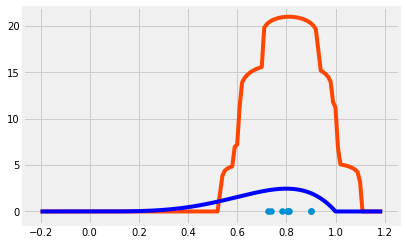

In [18]:
xvec=np.arange(-0.2,1.2,0.01)  # same grid as in the function
plt.plot(xvec, yout, c = 'orangered')
plt.scatter(xdata, np.zeros(8)) # plotting the data values on x axis, very similar to a rugplot
plt.plot(xvec, stats.beta.pdf(xvec, 5, 2), c = 'blue') # plot true pdf (the mother dist that generated the data)

### Area under orange curve = 8 because we added up 8 boxes.

### Area under blue curve = 1 because it is beta(5,2) pdf

### How to make orange curve have area = 1?  Divide yout by 8.  

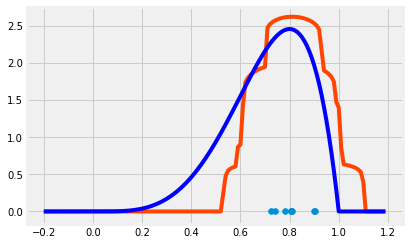

In [19]:
xvec=np.arange(-0.2,1.2,0.01)  
plt.plot(xvec, 1/len(xdata) * yout, c = 'orangered')
plt.scatter(xdata, np.zeros(8))
plt.plot(xvec, stats.beta.pdf(xvec, 5, 2), c = 'blue')

### Now the curves have the same area, both = 1

### Orange curve is an estimate of the blue curve, sometimes too high, sometimes too low, and in few places just right 

In [25]:
# suppose I have dat1 = [1.2, 3.33, -2.444, 9.982, 3.14159, ...]
dat1 = stats.expon.rvs(.1, size = 12)
dat1
datmin = 0 # who cares about the exact value of dat1.min()
datmax = dat1.max() # definitely care about this



array([0.37723988, 2.96275387, 0.56185448, 0.2538259 , 0.68477047,
       1.05899834, 0.34332359, 1.27639146, 1.39567293, 0.29953613,
       2.64676927, 1.99679557])

0.2538259014172807

2.9627538682388197

In [36]:
def putaboxonit(datvec, h):
    #xvec=np.arange(-0.2,1.2,0.01)
    xmin = datvec.min()
    xmax = datvec.max()
    nobs = len(datvec)
    xvec = np.arange(xmin - 2*h, xmax + 2*h, .001)
    
    yvec = np.zeros(len(xvec))
    for i in datvec:
        yvec += stats.uniform.pdf(xvec,i-h,2*h)
    yvec = 1/nobs * yvec
    
    plt.ylim(top = 1.6 * yvec.max())
    plt.plot(xvec, yvec, c='orangered')
    return yvec, xvec
    

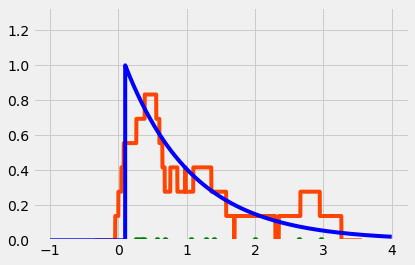

In [34]:
out = putaboxonit(dat1, .3)
xvec = np.arange(-1, 4, .001)
plt.plot(xvec, stats.expon.pdf(xvec, .1), c='blue')
plt.scatter(dat1, 0*dat1, c='green')

In [51]:
dat1 = stats.norm.rvs(0, 5, size = 40)
dat1

array([ -2.22950969,  -4.41212281,  -1.92711279,  -7.69539973,
       -12.77489508,  -2.40003895,  -0.39506084,   2.79253462,
        -6.78457469,  -3.52931964,  -2.8748444 ,   1.297831  ,
         2.72273011,  -0.62833629,   8.19885506,  -1.09608704,
         1.14213798,   1.82671056,   2.57891533,   1.60417544,
        -0.11068004,   3.53396843,   0.10925151,  13.47084849,
         7.81160064,  -4.63278417,  -2.49227631,   9.83916374,
         1.80468936,   3.84633922,   3.42637408,   0.18396466,
        -1.66123332,  -3.91881268,  -7.69010721,   4.32216115,
         5.77580786,   6.47777586,  -7.42942035,   2.6740276 ])

array([ -2.22950969,  -4.41212281,  -1.92711279,  -7.69539973,
       -12.77489508,  -2.40003895,  -0.39506084,   2.79253462,
        -6.78457469,  -3.52931964,  -2.8748444 ,   1.297831  ,
         2.72273011,  -0.62833629,   8.19885506,  -1.09608704,
         1.14213798,   1.82671056,   2.57891533,   1.60417544,
        -0.11068004,   3.53396843,   0.10925151,  13.47084849,
         7.81160064,  -4.63278417,  -2.49227631,   9.83916374,
         1.80468936,   3.84633922,   3.42637408,   0.18396466,
        -1.66123332,  -3.91881268,  -7.69010721,   4.32216115,
         5.77580786,   6.47777586,  -7.42942035,   2.6740276 ])

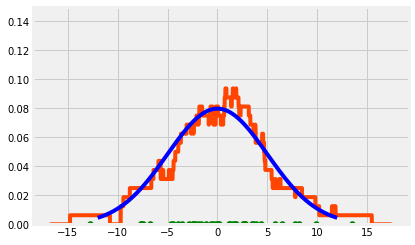

In [58]:
dat1
datmin = 0 # who cares about the exact value of dat1.min()
datmax = dat1.max() # definitely care about this
h=2
out = putaboxonit(dat1, h)
xvec = np.arange(-12, 12, .001)
plt.plot(xvec, stats.norm.pdf(xvec, 0, 5), c='blue')
plt.scatter(dat1, 0*dat1, c='green')